# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url) # YOUR CODE HERE
        city_weather = city_weather.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | flying fish cove
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | ratnagiri
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | yuzhno-kurilsk
Processing Record 14 of Set 1 | prince rupert
Processing Record 15 of Set 1 | namie
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | salinopolis
Processing Record 19 of Set 1 | lastoursville
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | fray luis beltran
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,6.25,93,75,4.12,CL,1714062499
1,port-aux-francais,-49.3500,70.2167,4.81,72,17,5.52,TF,1714062495
2,adamstown,-25.0660,-130.1015,23.18,90,7,8.82,PN,1714062486
3,flying fish cove,-10.4217,105.6791,26.82,89,75,4.63,CX,1714062413
4,blackmans bay,-43.0167,147.3167,10.96,75,95,0.45,AU,1714062484


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.25,93,75,4.12,CL,1714062499
1,port-aux-francais,-49.3500,70.2167,4.81,72,17,5.52,TF,1714062495
2,adamstown,-25.0660,-130.1015,23.18,90,7,8.82,PN,1714062486
3,flying fish cove,-10.4217,105.6791,26.82,89,75,4.63,CX,1714062413
4,blackmans bay,-43.0167,147.3167,10.96,75,95,0.45,AU,1714062484


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

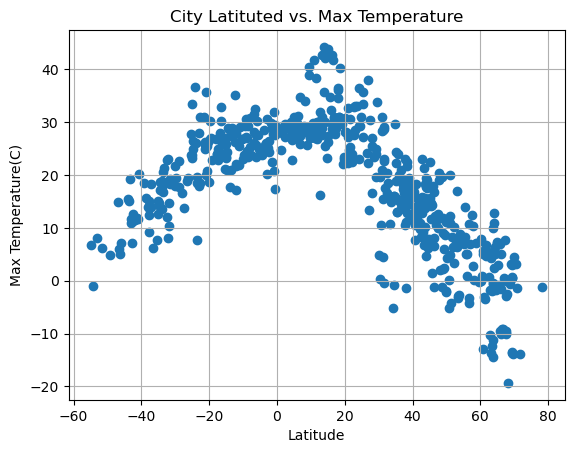

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Max Temperature(C)")
plt.grid()
plt.title("City Latituted vs. Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

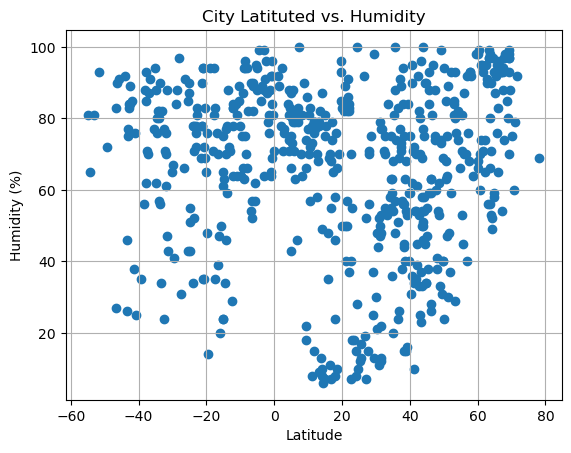

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid()
plt.title("City Latituted vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

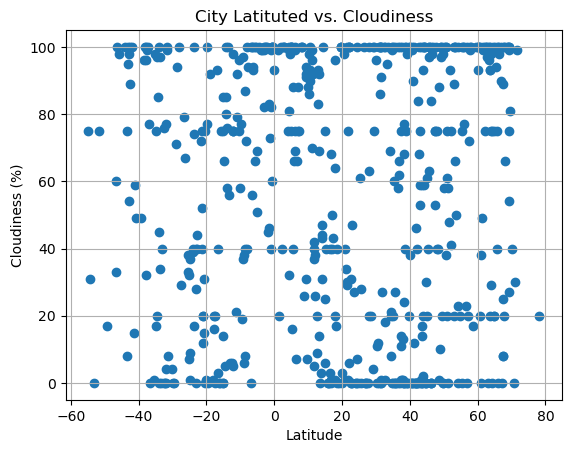

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title("City Latituted vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

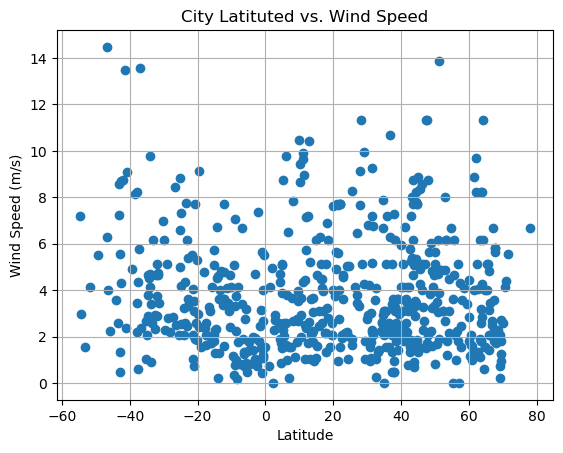

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title("City Latituted vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(data_frame, y_str):
    x_values = data_frame['Lat']
    y_values = data_frame[y_str]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(x_values.min() + .5, y_values.max() - 1), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_str)
    print(f"The r-quared is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,longyearbyen,78.2186,15.6401,-1.09,69,20,6.69,SJ,1714062346
6,petropavlovsk-kamchatsky,53.0452,158.6483,6.33,81,20,8.00,RU,1714062481
9,ratnagiri,16.9833,73.3000,27.80,74,50,3.97,IN,1714062569
10,sitka,57.0531,-135.3300,6.94,76,20,0.00,US,1714062534
12,yuzhno-kurilsk,44.0306,145.8556,4.65,100,100,3.53,RU,1714062524


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.25,93,75,4.12,CL,1714062499
1,port-aux-francais,-49.3500,70.2167,4.81,72,17,5.52,TF,1714062495
2,adamstown,-25.0660,-130.1015,23.18,90,7,8.82,PN,1714062486
3,flying fish cove,-10.4217,105.6791,26.82,89,75,4.63,CX,1714062413
4,blackmans bay,-43.0167,147.3167,10.96,75,95,0.45,AU,1714062484


###  Temperature vs. Latitude Linear Regression Plot

The r-quared is: 0.7429982995481875


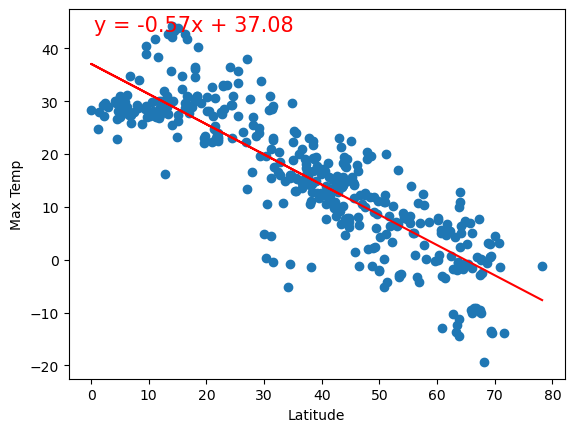

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(data_frame = northern_hemi_df, y_str = 'Max Temp')

The r-quared is: 0.5999247381690557


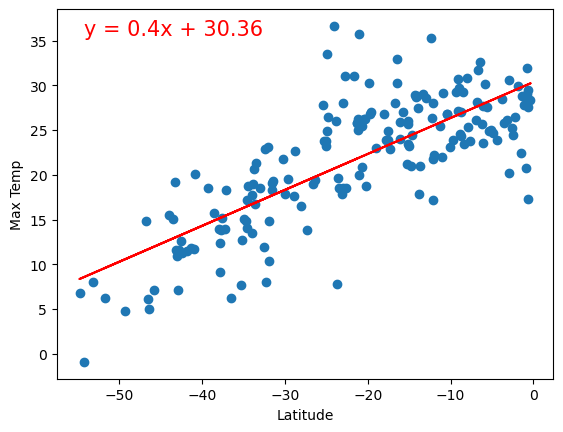

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(data_frame = southern_hemi_df, y_str = 'Max Temp')

**Discussion about the linear relationship:** When you are closer the the equator(Latitude 0) your maxium tempature is higher

### Humidity vs. Latitude Linear Regression Plot

The r-quared is: 0.04316626857640817


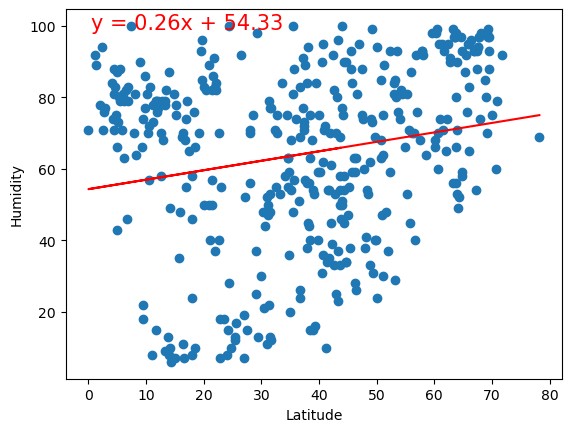

In [17]:
# Northern Hemisphere
plot_linear_regression(data_frame = northern_hemi_df, y_str = 'Humidity')

The r-quared is: 0.015133521168140492


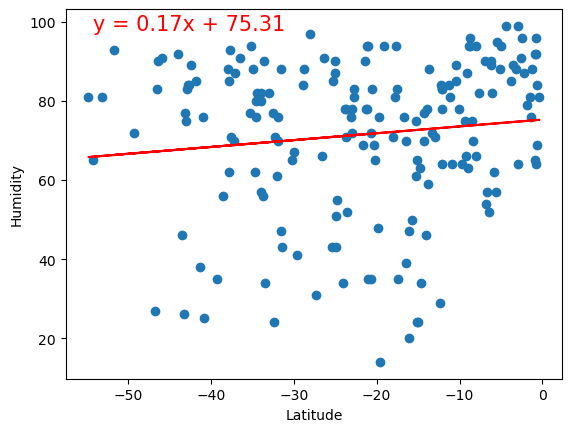

In [18]:
# Southern Hemisphere
plot_linear_regression(data_frame = southern_hemi_df, y_str = 'Humidity')

**Discussion about the linear relationship:** Humidity is more spread with the most northern hemisphere and the equator seem to have the most humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-quared is: 0.003105503662111889


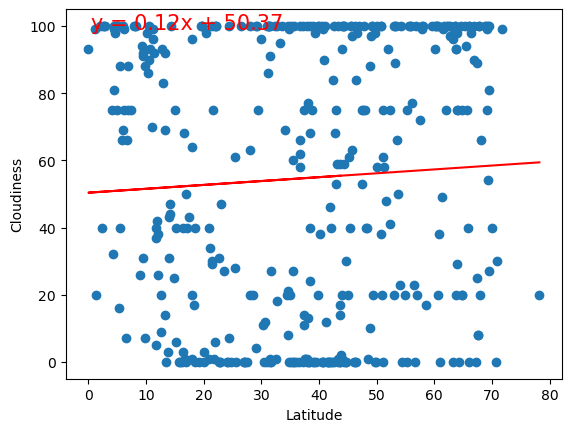

In [23]:
# Northern Hemisphere
plot_linear_regression(data_frame = northern_hemi_df, y_str = 'Cloudiness')

The r-quared is: 0.01798504624215326


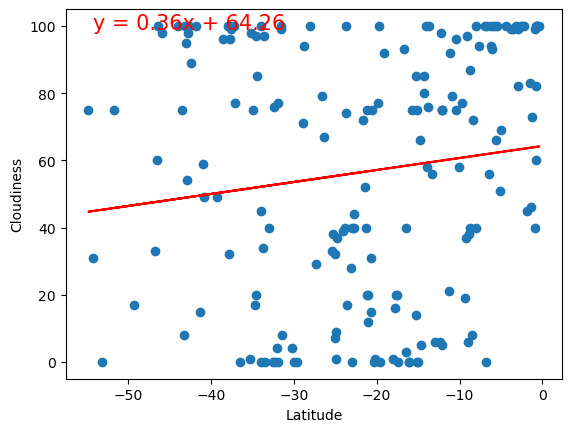

In [20]:
# Southern Hemisphere
plot_linear_regression(data_frame = southern_hemi_df, y_str = 'Cloudiness')

**Discussion about the linear relationship:** It seems that cloudiness very spread out with the northern hemisphere having more places with 100% and 0%

### Wind Speed vs. Latitude Linear Regression Plot

The r-quared is: 0.00020604765853601289


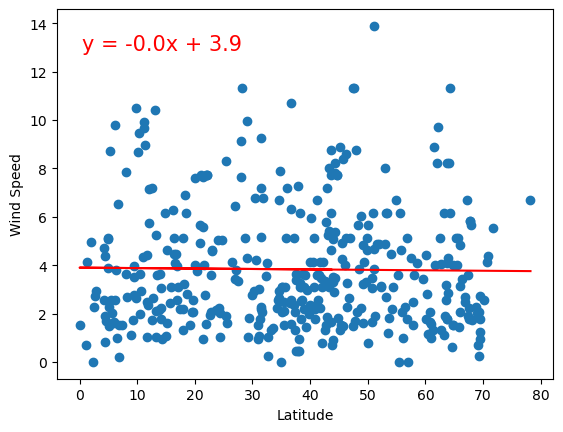

In [21]:
# Northern Hemisphere
plot_linear_regression(data_frame = northern_hemi_df, y_str = 'Wind Speed')

The r-quared is: 0.14361565801492135


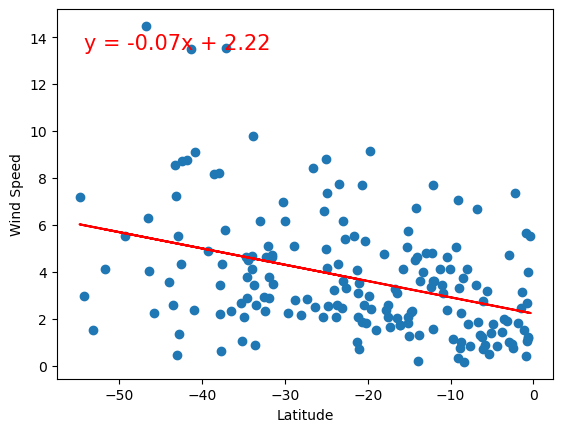

In [22]:
# Southern Hemisphere
plot_linear_regression(data_frame = southern_hemi_df, y_str = 'Wind Speed')

**Discussion about the linear relationship:** The wind speed in the northern hemisphere is even with the slope beign -0.0x + 3.9 but the southern hemisphere further south the higher the wind speed